$$\tau \dot{x}(t) = Mx(t) + I(t)$$

$$\dot{x}(t) = \frac{x(t + dt) - x(t)}{dt}$$

$$x(t+dt) = \biggl(1 + \frac{dt}{\tau} M \biggr) x(t) + \frac{dt}{\tau} I(t)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

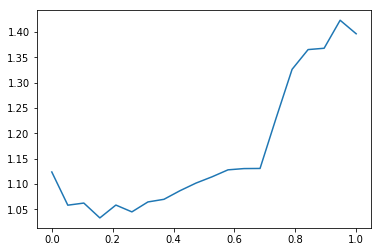

In [135]:
dt = 0.1     # ms, timestep
tau = 10.0    # ms, timescale
nNeuron = 20
eta = dt / tau

def make_trans_matrix(alphaExcInh):
    nExc = nNeuron // 2
    nInh = nNeuron // 2
    
    M = np.zeros((nNeuron, nNeuron))
    M[:nExc, :nExc] = alphaExcInh * np.random.uniform(0, 10, (nExc, nExc))
    M[nExc:, :nExc] = (1 - alphaExcInh) * np.random.uniform(0, 10, (nInh, nExc))
    M[:nExc, nExc:] = -(1 - alphaExcInh) * np.random.uniform(0, 10, (nExc, nInh))
    #M[nExc:, nExc:] = -(1 - alphaExcInh) * np.random.uniform(0, 100, (nInh, nInh))
    Meff = eta * M
    np.fill_diagonal(Meff, (1 - eta)*np.ones(nNeuron))
    return Meff

alphaLst = np.linspace(0, 1, 20)
maxEig = [np.max(np.real(np.linalg.eig(make_trans_matrix(a))[0])) for a in alphaLst]

plt.figure()
plt.plot(alphaLst, maxEig)
plt.show()

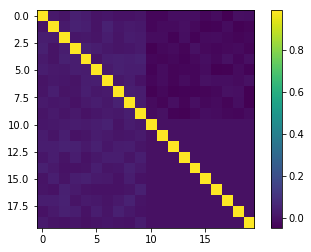

In [136]:
plt.figure()
plt.imshow(make_trans_matrix(0.5))
plt.colorbar()
plt.show()

In [140]:
def simulate(M, T, haveNeg=True):
    nT = int(T/dt)
    
    x = np.zeros((nT, nNeuron))
    x[0] = np.random.uniform(0, 1, nNeuron)
    
    for i in range(nT-1):
        I = 0.1 * np.random.uniform(0, 1, nNeuron) #+ 0.1 * np.sin(2 * np.pi * i * dt / (2 * tau))
        x[i+1] = M.dot(x[i]) + eta * I
        if not haveNeg:
            x[i+1][x[i+1] < 0] = 0
        

    times = np.arange(nT) * dt
    xMag = np.linalg.norm(x, axis=1)

    plt.figure()
    plt.plot(times, xMag)
    plt.show()
    
    return x

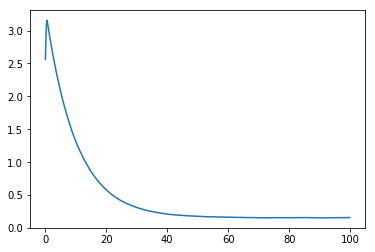

In [145]:
Meff = make_trans_matrix(0.38)
x = simulate(Meff, 100, haveNeg=False)

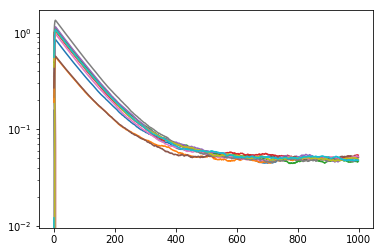

In [146]:
plt.figure()
for i in range(nNeuron):
    plt.semilogy(x[:, i])
plt.show()

In [117]:
np.mean(x, axis=0)

array([1.70275763e-03, 1.28599215e-03, 2.44095131e-03, 2.12686784e-04,
       7.09376326e-04, 3.19703348e-04, 2.42413898e-03, 6.35321276e-04,
       4.37798950e-03, 3.22985834e-03, 7.96653494e-01, 7.89386211e-01,
       8.87781359e-01, 7.97287236e-01, 8.06295306e-01, 1.00969451e+00,
       8.80829328e-01, 7.50991782e-01, 8.74382281e-01, 7.55457033e-01])